# Task Description

- Convert/store the dataset locally and preprocess the data.
- This is usually equivalent to transforming a table from a database into First Normal Form (1NF).
- Describe the preprocessing steps and why they were needed.
- Describe the file type/format, for example CSV file.
- Process the dataset for missing data if needed. For this part use
Pandas DataFrame. 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
# Imports .xlsx file format reader
!pip install openpyxl
%matplotlib inline


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


The retail sales volume tables from the ONS Retail Sales Index spreadsheets which we want to use are KPSA1 and KPSA3
Each of these Excel sheets contains two tables stacked vertically on top of each other.
We want to import the first table (top table) from each of these sheets into a pandas DataFrame as the first step.

**Attributions**
- Docs: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
- How to work with Excel files in pandas: https://blog.devgenius.io/reading-excel-files-with-pandas-the-basics-6a6be9cc8763

In [6]:
# This function reads in the correct Excel sheets
def processRetailSalesIndexExcelSheet(fpath, sheetName, nrows, picklePath):
    # Read in the excel file for RSI sales volume table
    salesvol_df = pd.read_excel(
        fpath, # filepath
        engine='openpyxl', # this engine supports newer Excel file formats
        sheet_name=sheetName, # sheet name from excel file: will be KPSA1 and KPSA3
        skiprows=5, # Skip first 5 rows because they are not the actual table, but rather descriptions of the table.
        header = [0, 1, 2], # Header contains 3 lines in the Excel file: column names, then AGG/SIC, then Dataset Identifier Code
        nrows = nrows, # Number of rows in the target table (Excel sheet contains two vertically-stacked tables)
        parse_dates=[0], # Parse the first column of dates: format is'2023 Jun', '2023 May' etc.
        date_format='%Y %B'
    )
    # Drop the two header rows consisting of AGG/SIC and Dataset identifier codes, and leave only the column names for retail sectors in the header
    salesvol_df.columns = salesvol_df.columns.droplevel([1, 2])
    # Save the table as a pickle file for easy loading
    salesvol_df.to_pickle(picklePath)
    # Return the dataframe
    return salesvol_df

In [5]:
# Read in KPSA1 for seasonally-adjusted sales volume %-change on same month a year earlier
ksa1_df = processRetailSalesIndexExcelSheet('./data/retail_sales.xlsx', 'KPSA1', 430, './data/ksa1.pkl')

NameError: name 'processRetailSalesIndexExcelSheet' is not defined

In [7]:
ksa1_df.tail(5)

NameError: name 'ksa1_df' is not defined

In [101]:
# Read in KPSA3 for %-change in sales volume on previous month
ksa3_df = processRetailSalesIndexExcelSheet('./data/retail_sales.xlsx', 'KPSA3', 430, './data/ksa3.pkl')
ksa3_df.head(5)

,Time Period,All retailing including automotive fuel [note1],All retailing excluding automotive fuel [note 1],Predominantly food stores,Total of predominantly non-food stores [Note 2],Non-specialised stores [Note 2],"Textile, clothing and footwear stores [Note 2]",Household goods stores [Note 2],Other stores [Note 2],Non-store retailing,Predominantly automotive fuel [Note 1]
0,1988 Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1988 Feb,NaN,-2.3,-0.3,-3.1,-0.7,-3.8,-4.0,-3.0,-5.4,NaN
2,1988 Mar,NaN,0.4,0.0,0.1,0.5,-1.8,1.3,0.4,4.2,NaN
3,1988 Apr,NaN,1.5,0.7,1.9,0.5,2.1,2.3,2.2,2.6,NaN
4,1988 May,NaN,-0.3,-0.8,0.0,1.1,-0.4,0.0,-0.1,0.0,NaN


In [8]:
# Read in the DataFrames...
ksa1_df = pd.read_pickle('./data/ksa1.pkl')
ksa3_df = pd.read_pickle('./data/ksa3.pkl')

In [9]:
# Sets the Time Period (year-month) as the index for each of these data frames
ksa1_df2 = ksa1_df.set_index('Time Period')
ksa3_df2  = ksa3_df.set_index('Time Period')
ksa1_df2.head(3)

,All retailing including automotive fuel [note1],All retailing excluding automotive fuel [note 1],Predominantly food stores,Total of predominantly non-food stores [Note 2],Non-specialised stores [Note 2],"Textile, clothing and footwear stores [Note 2]",Household goods stores [Note 2],Other stores [Note 2],Non-store retailing,Predominantly automotive fuel [Note 1]
Time Period,,,,,,,,,,
1988 Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988 Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988 Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Creates a new data frame which extracts the 'All retailing excluding automotive fuel' column from each data frame

# First rename the column referring to all retailing sales volumes to add whether this column refers to KPSA1 or KPSA3
ksa1_df3 = ksa1_df2.rename(columns={
    'All retailing excluding automotive fuel [note 1]': 'KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier)'}
    )
ksa3_df3 = ksa3_df2.rename(columns={
    'All retailing excluding automotive fuel [note 1]': 'KPSA3 All retailing excl. automotive fuel (%-change on previous month)'}
    )

In [57]:
ksa1_df3.tail(5)

,All retailing including automotive fuel [note1],KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier),Predominantly food stores,Total of predominantly non-food stores [Note 2],Non-specialised stores [Note 2],"Textile, clothing and footwear stores [Note 2]",Household goods stores [Note 2],Other stores [Note 2],Non-store retailing,Predominantly automotive fuel [Note 1]
Time Period,,,,,,,,,,
2023 Jun,-2.0,-1.9,-2.5,-1.9,4.4,0.2,-1.8,-7.1,-0.5,-2.1
2023 Jul,-3.3,-3.5,-5.5,-2.8,-0.8,-2.9,-1.5,-4.5,0.1,-1.0
2023 Aug,-1.3,-1.4,-3.4,-0.3,2.8,1.7,-1.6,-2.8,1.3,-1.0
2023 Sep,-1.3,-1.5,-0.8,-3.0,1.1,-3.4,-3.8,-4.5,1.0,0.6
2023 Oct,-2.7,-2.4,-1.3,-4.9,1.7,-6.4,-2.8,-8.1,1.9,-5.8


In [58]:
# Extract the columns for all retail sales volume except automotive fuel from both datasets
ksa1_col_name = ksa1_df3.columns[1] # Get names of columns
ksa3_col_name = ksa3_df3.columns[1]
ksa1_allretailing_col = ksa1_df3.iloc[:, 1] # Get the actual column for all retail sales using index-slicing with iloc
ksa3_allretailing_col = ksa3_df3.iloc[:, 1]


In [59]:
# Create new dataframe with kpa1 (change on a year earlier) and kpa3 (change on previous month) for all retailing columns side-by-side
sales_volume_df = pd.DataFrame({
    ksa1_col_name: ksa1_allretailing_col,
    ksa3_col_name: ksa3_allretailing_col
})
sales_volume_df.tail(10)

,KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier),KPSA3 All retailing excl. automotive fuel (%-change on previous month)
Time Period,,
2023 Jan,-5.9,1.3
2023 Feb,-4.0,1.1
2023 Mar,-4.9,-1.3
2023 Apr,-3.4,0.8
2023 May,-2.2,-0.1
2023 Jun,-1.9,0.5
2023 Jul,-3.5,-1.3
2023 Aug,-1.4,0.5
2023 Sep,-1.5,-1.3


In [60]:
# Pickle this dataframe for easy loading
sales_volume_df.to_pickle('./data/combined_sales.pkl')

In [61]:
combined_sales_df = pd.read_pickle('./data/combined_sales.pkl')

In [62]:
combined_sales_df.tail(10)

,KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier),KPSA3 All retailing excl. automotive fuel (%-change on previous month)
Time Period,,
2023 Jan,-5.9,1.3
2023 Feb,-4.0,1.1
2023 Mar,-4.9,-1.3
2023 Apr,-3.4,0.8
2023 May,-2.2,-0.1
2023 Jun,-1.9,0.5
2023 Jul,-3.5,-1.3
2023 Aug,-1.4,0.5
2023 Sep,-1.5,-1.3


In [25]:
# Now we have to restructure weather parameter tables.
# Right now, each row represents a year and each column a month (wide format)
# We want the weather tables to be in long format (year-month per row), like in the sales dataframe shown above

def importWeatherTable(fpath, rows_to_skip, picklePath):
    weather_df = pd.read_csv(
        fpath,
        sep=' ', # even though saved as .csv, these files are actually tsv files and tab-delimited, so use ' ' as separator
        skipinitialspace=True, # spacing between values is inconsistent, so setting this to True involves skipping spaces
        index_col=0, # set year-column as index
        skiprows=rows_to_skip, # skip the description of weather parameter at the top
        header=0 # sets first row as header/column names
    )
    weather_df.to_pickle(picklePath)
    return weather_df

In [26]:
airfrost_df = importWeatherTable('./data/air_frost.csv', 5, './data/air_frost.pkl')
heavyraindays_df = importWeatherTable('./data/heavy_raindays.csv', 5, './data/heavy_raindays.pkl')
maxtemp_df = importWeatherTable('./data/max_temp.csv', 5, './data/max_temp.pkl')
mintemp_df = importWeatherTable('./data/min_temp.csv', 5, './data/min_temp.pkl')
meantemp_df = importWeatherTable('./data/mean_temp.csv', 5, './data/mean_temp.pkl')
rainfall_df = importWeatherTable('./data/rainfall.csv', 5, './data/rainfall.pkl')
sunshine_df = importWeatherTable('./data/sunshine.csv', 5, './data/sunshine.pkl')
sunshine_df.head(5) # show how structure looks like before formatting

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
year,,,,,,,,,,,,,,,,,
1910,50.9,72.2,130.3,122.8,190.5,177.5,148.6,128.8,120.5,74.5,67.0,29.9,---,443.7,454.9,262.0,1313.5
1911,46.1,60.4,102.0,126.2,208.1,205.1,250.4,201.1,163.2,86.2,56.6,36.7,136.4,436.3,656.5,306.0,1542.1
1912,33.5,53.5,89.7,195.6,153.8,129.7,133.3,80.5,110.8,91.6,33.5,19.4,123.8,439.1,343.5,235.9,1124.8
1913,29.3,52.0,100.9,115.5,161.2,170.9,133.0,144.1,105.2,88.1,58.4,32.0,100.7,377.6,447.9,251.6,1190.5
1914,28.6,59.1,93.7,202.3,157.4,207.3,145.5,172.8,158.7,73.0,51.0,36.6,119.7,453.4,525.6,282.7,1386.0


In [27]:
# Keep only months jan-dec (drop columns for seasons/annual), as this is the granularity we want to investigate for the kpa1 and kpa3 sales volume data
def dropSeasons(df):
    df2 = df.iloc[:, 0:12]
    return df2

# Apply to all the weather dataframes
airfrost_df2 = dropSeasons(airfrost_df)
heavyraindays_df2 = dropSeasons(heavyraindays_df)
maxtemp_df2 = dropSeasons(maxtemp_df)
mintemp_df2 = dropSeasons(mintemp_df)
meantemp_df2 = dropSeasons(meantemp_df)
rainfall_df2 = dropSeasons(rainfall_df)
sunshine_df2 = dropSeasons(sunshine_df)

# Check for missing values in the weather datasets
weather_dataframes = [airfrost_df2, heavyraindays_df2, maxtemp_df2, mintemp_df2, meantemp_df2, rainfall_df2, sunshine_df2]
for df in weather_dataframes:
    nullcounts = df.isnull().sum() # counts up missing values
    for nullcount in nullcounts:
        if nullcount != 0:
            print(nullcount) # print only if missing values count is not null

In [28]:
# Melts the DataFrame from wide to long format
# Attribution for melting dataframes and wide to long format conversion in pandas:
# https://www.kdnuggets.com/2023/03/beginner-guide-pandas-melt-function.html
def meltWeatherFrame(df, parameter_name): # args: the dataframe to melt and the name (string) of the weather variable
    # melt the data frame: id_vars contains unchanged identifier variable, var_name refers to new column that will contain former column/header-names
    # capitalize (using .title()) string method and set the column name for the new melted column to the parameter_name string argument value
    melted_df = pd.melt(df, id_vars=['year'], var_name='month', value_name=parameter_name.title())
    print(f"{parameter_name.title()}: Melted Dataframe")
    print(melted_df.head(10))
    return melted_df

In [29]:
# Creates a new column in the dataframe which concatenates the year and the month
def createTimePeriodColumn(df):
    # Convert year to string and concatenate with month name to get new data column in string format '1999 - Aug'
    df["Time Period"] = df["year"].astype(str) + " " + df["month"]
    print("Time Period column added:")
    print(df.head(10))
    return df

In [30]:
# Converts the string of form '1960 jan' to 1960-01-01 to enable sorting by date
def convertTimePeriodColumnToDateTime(df):
    df['Time Period'] = pd.to_datetime(df['Time Period'],  format='%Y %b')
    sorted_df = df.sort_values(by='Time Period')
    print("Sorted DF:")
    print(sorted_df.head(10))
    return sorted_df

In [31]:
# Re-structure weather tables using the following function so that the format matches that of the sales volume tables
def wideToLongWeatherData(df, parameter_name):
    # Turns the index column into a normal column and adds a new auto-generated integer index column
    df.reset_index(inplace=True)
    # Collapse horizontal month columns into a single column
    melted_df = meltWeatherFrame(df, parameter_name)
    # Concatenates year and month columns
    melted_df_with_timeperiod = createTimePeriodColumn(melted_df)
    # Sorts the dataframes by month
    sorted_df = convertTimePeriodColumnToDateTime(melted_df_with_timeperiod)
    # Sets the year-month as the identifier column
    sorted_df_with_date_index = sorted_df.set_index('Time Period')
    # Drop the old year and month cols now that there is one single 'Time Period' column
    sorted_df_with_date_index.drop(['year', 'month'], axis=1, inplace=True)
    print("Dataframe now with date year-month column:")
    print(sorted_df_with_date_index.head(10))
    return sorted_df_with_date_index

In [32]:
airfrost_long = wideToLongWeatherData(airfrost_df2, "days of airfrost")
heavyraindays_long = wideToLongWeatherData(heavyraindays_df2, "days with over 1mm rain")
maxtemp_long = wideToLongWeatherData(maxtemp_df2, "max temperature (C)")
mintemp_long = wideToLongWeatherData(mintemp_df2, "min temperature (C)")
meantemp_long = wideToLongWeatherData(meantemp_df2, "mean temperature (C)")
rainfall_long = wideToLongWeatherData(rainfall_df2, "rainfall in mm ")
sunshine_long = wideToLongWeatherData(sunshine_df2, "hours of sunshine")


Days Of Airfrost: Melted Dataframe
   year month  Days Of Airfrost
0  1960   jan              15.8
1  1961   jan              14.5
2  1962   jan              10.5
3  1963   jan              27.4
4  1964   jan              11.6
5  1965   jan              16.7
6  1966   jan              16.1
7  1967   jan              11.0
8  1968   jan              13.1
9  1969   jan               9.3
Time Period column added:
   year month  Days Of Airfrost Time Period
0  1960   jan              15.8    1960 jan
1  1961   jan              14.5    1961 jan
2  1962   jan              10.5    1962 jan
3  1963   jan              27.4    1963 jan
4  1964   jan              11.6    1964 jan
5  1965   jan              16.7    1965 jan
6  1966   jan              16.1    1966 jan
7  1967   jan              11.0    1967 jan
8  1968   jan              13.1    1968 jan
9  1969   jan               9.3    1969 jan
Sorted DF:
     year month  Days Of Airfrost Time Period
0    1960   jan              15.8  1960-01-01


In [33]:
# Have a quick look at these new tables, to verify that they are in the same long-format structure as sales data:
airfrost_long.head(10)

,Days Of Airfrost
Time Period,
1960-01-01,15.8
1960-02-01,16.6
1960-03-01,5.4
1960-04-01,2.7
1960-05-01,0.6
1960-06-01,0.0
1960-07-01,0.0
1960-08-01,0.0
1960-09-01,0.3


In [34]:
heavyraindays_long.head(10)

,Days With Over 1Mm Rain
Time Period,
1891-01-01,13.6
1891-02-01,3.5
1891-03-01,13.2
1891-04-01,8.8
1891-05-01,15.3
1891-06-01,8.9
1891-07-01,15.3
1891-08-01,21.5
1891-09-01,15.5


In [35]:
maxtemp_long.head(10)

,Max Temperature (C)
Time Period,
1884-01-01,7.3
1884-02-01,6.8
1884-03-01,8.5
1884-04-01,10.1
1884-05-01,14.5
1884-06-01,17.1
1884-07-01,18.8
1884-08-01,20.2
1884-09-01,17.0


In [36]:
# We now need to select the columns which go from January 1988 to be consistent with the sales time range
def selectRowsFrom1988(df):
    df_shortened = df.loc['1988-01-01':]
    return df_shortened


In [37]:
airfrost_long_1988 = selectRowsFrom1988(airfrost_long)
heavyraindays_long_1988 = selectRowsFrom1988(heavyraindays_long)
mintemp_long_long_1988 = selectRowsFrom1988(mintemp_long)
maxtemp_long_1988 = selectRowsFrom1988(maxtemp_long)
meantemp_long_1988 = selectRowsFrom1988(meantemp_long)
rainfall_long_1988 = selectRowsFrom1988(rainfall_long)
sunshine_long_1988 = selectRowsFrom1988(sunshine_long)

In [39]:
airfrost_long_1988.head(5) # should start jan 1988

,Days Of Airfrost
Time Period,
1988-01-01,8.6
1988-02-01,9.5
1988-03-01,8.2
1988-04-01,5.2
1988-05-01,0.5


In [43]:
# Converts the yyyy-mm-dd datetime index into string Year-Month like in the sales dataframes
def convertDates(df):
    df.index = df.index.strftime('%Y %b')

dataframes_to_convert = [
    airfrost_long_1988,
    heavyraindays_long_1988,
    mintemp_long_long_1988, 
    maxtemp_long_1988,
    meantemp_long_1988, 
    rainfall_long_1988,
    sunshine_long_1988
]

In [44]:
for df in dataframes_to_convert:
    convertDates(df)
    print(df.shape)

(432, 1)
(432, 1)
(432, 1)
(432, 1)
(432, 1)
(432, 1)
(432, 1)


In [45]:
# Concatenate all the weather-parameter columns into single dataframe (axis=1 means to concatenate columns side-by-side rather than rows)
weather_combined = pd.concat(dataframes_to_convert, axis=1)
# Save as pickle
weather_combined.to_pickle('combined_weather.pkl')
# Save as csv
weather_combined.to_csv('combined_weather.csv')

In [112]:
# Now index is the same, can combine sales and weather dataframes for final analysis table
all_combined = pd.concat([combined_sales_df, weather_combined], axis=1)
all_combined.to_pickle('combined_data.pkl')
all_combined.to_csv('combined_data.csv')
all_combined

,KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier),KPSA3 All retailing excl. automotive fuel (%-change on previous month),Days Of Airfrost,Days With Over 1Mm Rain,Min Temperature (C),Max Temperature (C),Mean Temperature (C),Rainfall In Mm,Hours Of Sunshine
Time Period,,,,,,,,,
1988 Jan,NaN,NaN,8.6,21.1,1.5,6.70,4.10,169.9,46.9
1988 Feb,NaN,-2.3,9.5,13.7,1.1,6.70,3.90,90.3,87.7
1988 Mar,NaN,0.4,8.2,18.5,2.0,8.20,5.10,126.6,89.2
1988 Apr,NaN,1.5,5.2,9.1,3.3,11.00,7.10,52.8,128.7
1988 May,NaN,-0.3,0.5,10.8,6.0,15.00,10.50,58.5,190.7
...,...,...,...,...,...,...,...,...,...
2023 Aug,-1.4,0.5,0.0,14.5,11.4,19.30,15.30,89.1,148.1
2023 Sep,-1.5,-1.3,0.0,13.5,11.0,19.40,15.20,119.4,142.4
2023 Oct,-2.4,-0.1,1.1,16.9,7.6,14.00,10.80,171.5,84.8


In [113]:
# Now we can see that the first few rows of the KPSA1 sales data and the last two months' rows for the KPSA3 
# sales data have some NaN missing values, which are not well-suited to machine-learning algorithms...
print(all_combined.isna().sum())

KPSA1 All retailing excl. automotive fuel (%-change on same month a year earlier)    14
KPSA3 All retailing excl. automotive fuel (%-change on previous month)                3
Days Of Airfrost                                                                      0
Days With Over 1Mm Rain                                                               0
Min Temperature (C)                                                                   0
Max Temperature (C)                                                                   0
Mean Temperature (C)                                                                  0
Rainfall In Mm                                                                        0
Hours Of Sunshine                                                                     0
dtype: int64


In [ ]:
###### How to deal with these missing values????
# The problem here is that if we use the pandas bfill or ffill functions, this will not reflect possible sales-volume change from month-to-month and
# skew the results of the model. 
# Using the mean is possible but wisll not really capture the pattern of fluctuations between months either. 
# Pandas offers various ways to 'interpolate' these missing values such as 'linear' interpolation, 'time' interpolation for time-series
# We will therefore use some basic line-graph visualizations using matplotlib to compare how 'naturally' each interpolation function
# for handling missing values works.


In [137]:
# axis=0 means calculate the mean along each column and fill the NAs in that column with the column mean
meanfill_df = all_combined.copy()
# Sets the index back to datetime for easier plotting of the graphs below
meanfill_df.index = pd.to_datetime(meanfill_df.index, format='%Y %b')
meanfill_df = meanfill_df.fillna(meanfill_df.mean(axis=0))

# Other kinds of missing value handling using pandas interpolation
# Attribution: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
# Linear interpolation: 'Ignore the index and treat the values as equally spaced.'
linear_interpolated_df = all_combined.copy()
linear_interpolated_df.index = pd.to_datetime(linear_interpolated_df.index, format='%Y %b')
linear_interpolated_df = linear_interpolated_df.interpolate(method='linear', limit_direction='both', axis=0)

# Interpolation using time series by passing in method='time' to interpolate function
# Docs: 'Works on daily and higher resolution data to interpolate given length of interval.'
time_interpolated_df = all_combined.copy()
# Turn the time-index column back to datetime to enable the time-series based interpolation
time_interpolated_df.index = pd.to_datetime(time_interpolated_df.index, format='%Y %b')
time_interpolated = time_interpolated_df.interpolate(method='time', limit_direction='both', axis=0)

# Spline interpolation method
# Docs: 'These methods use the numerical values of the index. Both ‘polynomial’ and ‘spline’ require that you also specify an order (int)'
spline_interpolated_df = all_combined.copy()
spline_interpolated_df.index = pd.to_datetime(spline_interpolated_df.index, format='%Y %b')
spline_interpolated_df = spline_interpolated_df.interpolate(method='spline', order=1, limit_direction='both', axis=0)

# Interpolate using the nearest number
nearest_interpolated_df = all_combined.copy()
nearest_interpolated_df.index = pd.to_datetime(nearest_interpolated_df.index, format='%Y %b')
nearest_interpolated_df = nearest_interpolated_df.interpolate(method='nearest', limit_direction='both', axis=0)

# Akima cubic interpolation
# Attribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Akima1DInterpolator.html#scipy.interpolate.Akima1DInterpolator
# Fit piecewise cubic polynomials, given vectors x and y. 
# The interpolation method by Akima uses a continuously differentiable sub-spline built from piecewise cubic polynomials.
# The resultant curve passes through the given data points and will appear smooth and natural.
akima_interpolated_df = all_combined.copy()
akima_interpolated_df.index = pd.to_datetime(akima_interpolated_df.index, format='%Y %b')
akima_interpolated_df = akima_interpolated_df.interpolate(method='akima', limit_direction='both', axis=0)

In [138]:
# Use matplotlib to compare how interpolation looks for each KPA1 and KPA3 column...
# Do KPA1 (first column) to compare interpolation types first here

# Define the columns to plot (first column)
kpa1_interpolations = [meanfill_df.iloc[:, :1], linear_interpolated_df.iloc[:, :1], 
    time_interpolated_df.iloc[:, :1], spline_interpolated_df.iloc[:, :1], 
    nearest_interpolated_df.iloc[:, :1], akima_interpolated_df.iloc[:, :1]
]

kpa3_interpolations = [meanfill_df.iloc[:, 1:2], linear_interpolated_df.iloc[:, 1:2], 
    time_interpolated_df.iloc[:, 1:2], spline_interpolated_df.iloc[:, 1:2], 
    nearest_interpolated_df.iloc[:, 1:2], akima_interpolated_df.iloc[:, 1:2]
]

# Define names of plots
plot_names = ['missing values filled by mean', 'linear interpolation of missing values', 'time interpolation', 'spline interpolation order 1',
             'nearest value interpolation', 'akima cubic polynomial interpolation']


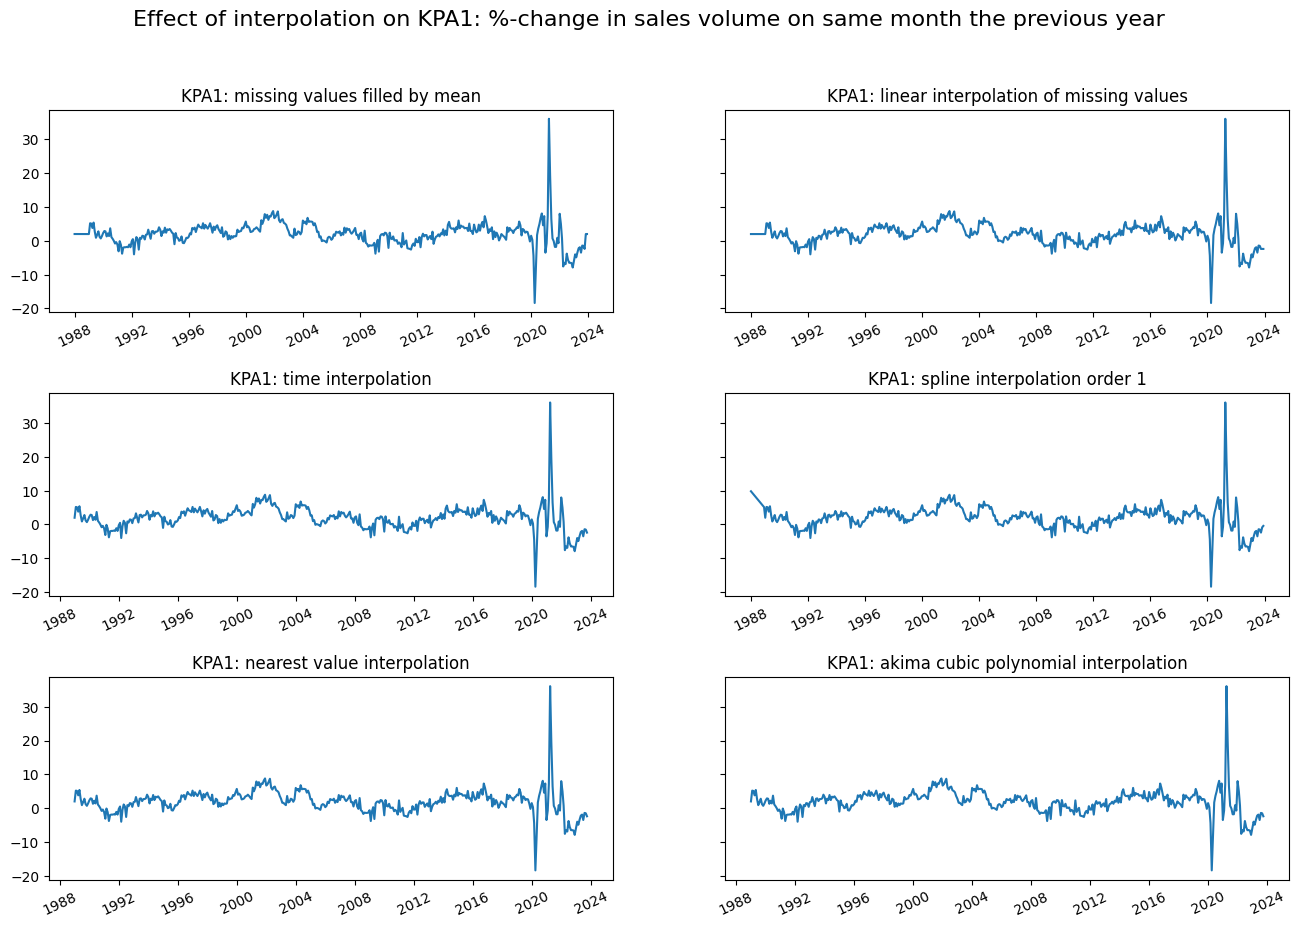

In [144]:
# Creates a 3x2 grid of subplots for the KPA1 interpolated values
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10), sharey=True) # share the axes

# Iterates over the axes to plot the interpolated data for KPA1 sales volumes
for i in range(3):
    for j in range(2):
        interpolations_index = (2 * i ) + j
        # Get the current subplot
        current_ax = axes[i, j]
        # x = the time index
        x = kpa1_interpolations[interpolations_index].index # plot the dates on the x-axis
        # y = the sales volumes %-changes
        y = kpa1_interpolations[interpolations_index].values.ravel() # plot the sales volumes (interpolated) on the y-axis --> turn these into a 1D array using ravel()
        # plot the variables on the current subplot
        current_ax.plot(x, y)
        # rotate the x-ticks for better visibility
        current_ax.tick_params(axis='x', rotation=25)
        # set labels and title
        current_ax.set_title(f"KPA1: {plot_names[interpolations_index]}")

# Title for the whole grid
fig.suptitle("Effect of interpolation on KPA1: %-change in sales volume on same month the previous year", fontsize=16)
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.4) 
plt.show()

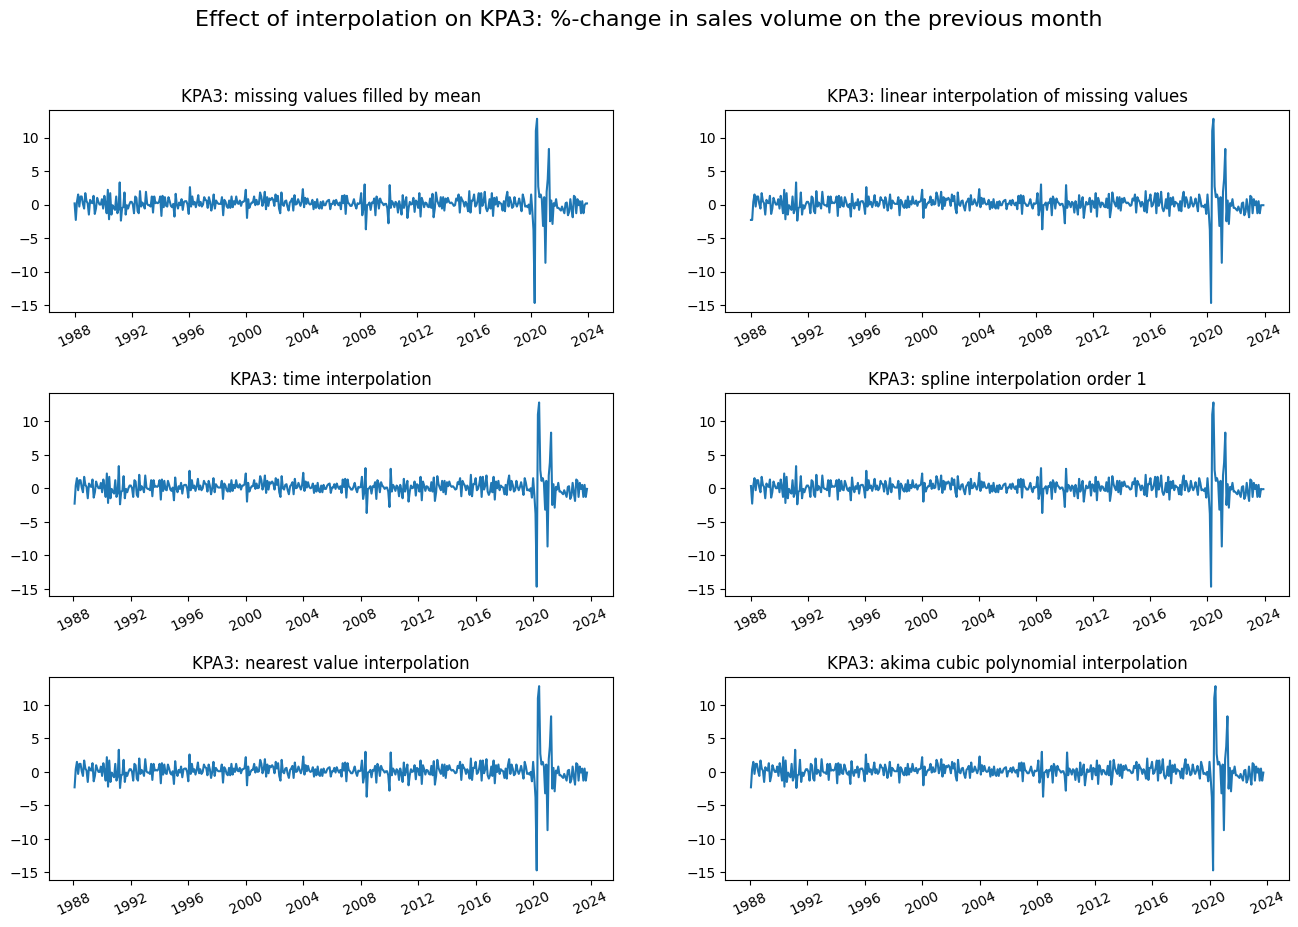

In [145]:
# Creates a 3x2 grid of subplots for the KPA3 interpolated values
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))

# Iterates over the axes to plot the interpolated data for KPA3 sales volumes percentage changes
for i in range(3):
    for j in range(2):
        interpolations_index = (2 * i ) + j
        # Get the current subplot
        current_ax = axes[i, j]
        # x = the time index
        x = kpa3_interpolations[interpolations_index].index # plot the dates on the x-axis
        # y = the sales volumes %-changes
        y = kpa3_interpolations[interpolations_index].values.ravel() # plot the sales volumes (interpolated) on the y-axis --> turn these into a 1D array using ravel()
        # plot the variables on the current subplot
        current_ax.plot(x, y)
        # rotate the x-ticks for better visibility
        current_ax.tick_params(axis='x', rotation=25)
        # set labels and title
        current_ax.set_title(f"KPA3: {plot_names[interpolations_index]}")

# Title for the whole grid
fig.suptitle("Effect of interpolation on KPA3: %-change in sales volume on the previous month", fontsize=16)
# Adjust the spacing between rows
plt.subplots_adjust(hspace=0.4) 
plt.show()

Comparing these graphs, it seems like the nearest-value interpolation, the akima interpolation and the time interpolation (for the first values on the graph for KPA1 and the last few values for KPA3) give the smoothest, most 'natural-looking' set of interpolated values compared to the other plots. Although these look to give similar interpolated values, the time-interpolated values will be used as this is time series data. However, these graphs for the %-changes in salaes show something else which is startling. For both KPA1 and KPA3, there seems to be an enormous fluctuation in sales prices around 2020 and 2021. We will explore these outliers and how to deal with this in the following sections on measures of spread and statistical visualizations.

In [146]:
time_interpolated.to_csv('interpolated_data.csv')